In [1]:
## All the packages I am going to use

import numpy as np
import scipy.linalg as lin
import os
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib as mpl
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# special matplotlib argument for improved plots
# from matplotlib import rcParams


# rcParams['figure.figsize'] = (8, 4)
# rcParams['figure.dpi'] = 150
# rcParams['lines.linewidth'] = 3
# rcParams['font.size'] = 14
# rcParams['font.family'] = 'StixGeneral'

In [7]:
##Constant table

h_bar=1.0
m=1.0
alpha=0.0

## Part 1. Rashba Effect

**Rashba Hamiltonian:**

$
\begin{align}
H_{Ra} &=\alpha(\vec{\mathbf{\sigma}} \times \vec{\mathbf{p}}) \cdot \hat{z} \\
&= \alpha(\sigma_{x}p_{y}-\sigma_{y}p_{x})
\end{align}
$

In [3]:
# define Pauli Matrcies

sigmax=np.array([[0,1],[1,0]])
sigmay=np.array([[0,-1j],[1j,0]])
sigmaz=np.array([[1,0],[0,-1]])



In [8]:
## Define Rashba Hamiltonian:

def Rash_Ham(kpx,kpy):
    H_0=(h_bar**2/(2*m))*(kpx+kpy**2)*(np.array([[1,0],[0,-1]]))
    H_1=alpha*(sigmax*kpy-sigmay*kpx)
    return H_0+H_1

print Rash_Ham(3,3)

[[ 6.+0.j  0.+0.j]
 [ 0.+0.j -6.+0.j]]


In [9]:
k_point=np.linspace(-3,3,200)

band1=[]
band2=[]

for i in k_point:
    eign_val=lin.eigh(Rash_Ham(i,0))[0]
    eign_vec=lin.eigh(Rash_Ham(i,0))[1]
    if eign_vec[1,0].imag<0:
        band1.append(eign_val[0])
        band2.append(eign_val[1])
    elif eign_vec[1,1].imag<0:
        band1.append(eign_val[1])
        band2.append(eign_val[0])

ValueError: x and y must have same first dimension

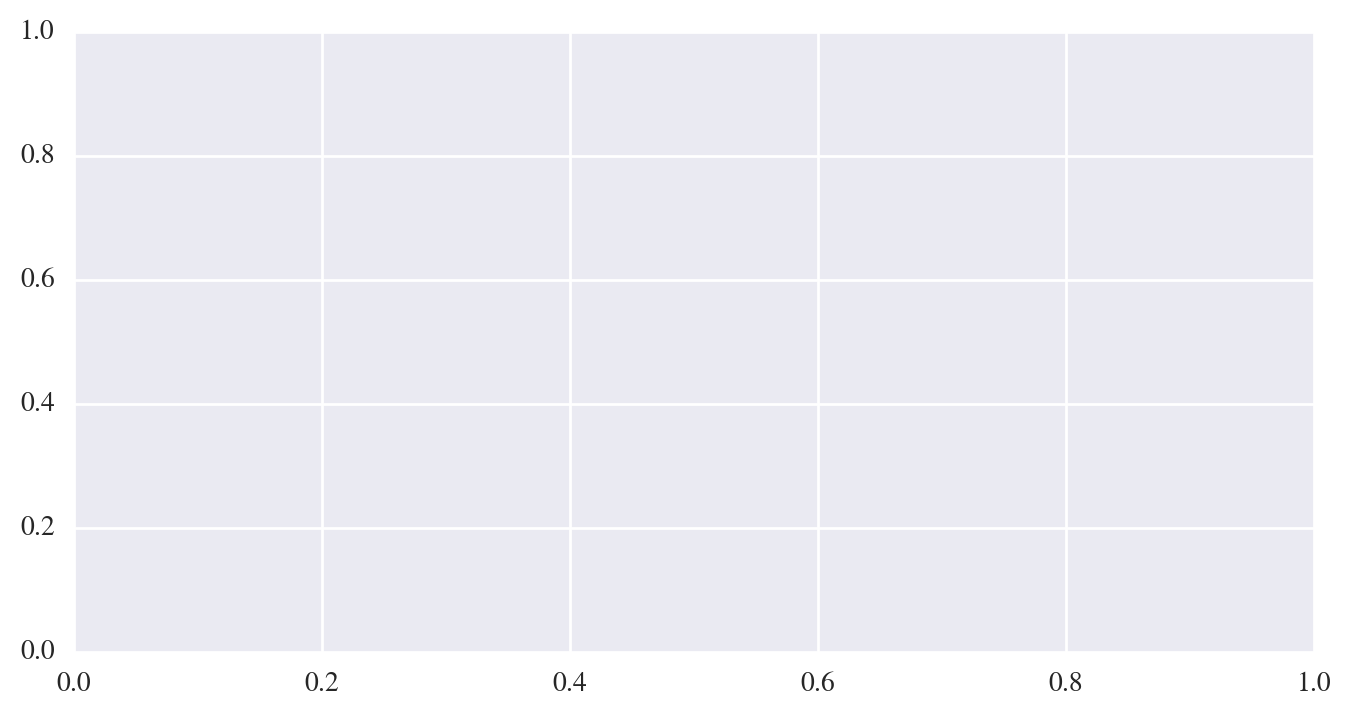

In [10]:
plt.plot(k_point,band1,'b-')
plt.plot(k_point,band2,'r-')
plt.show()

In [12]:
band2

[]

### Equal energy Surface (Fermi surface )

In this calculation, we will look at the energy $E_{F}=1$ in our parameter system

In [23]:
ra=1
kpt=[(ra*np.cos(the1),ra*np.sin(the1)) for the1 in np.linspace(-np.pi,np.pi,200)]

In [24]:
band1=[]
band2=[]

Energy=lin.eigh(Rash_Ham(kpt[0][0],kpt[0][1]))[0]
print Energy
# for i in kpt:
#     eign_vec=lin.eigh(Rash_Ham(i[0],i[1]))[1]
#     if eign_vec[1,0].imag<0:
#         band1.append(eign_val[0])
#         band2.append(eign_val[1])
#     elif eign_vec[1,1].imag<0:
#         band1.append(eign_val[1])
#         band2.append(eign_val[0])

[ 0.  1.]


In [18]:
for i in kpt:
    eign_val=lin.eigh(Rash_Ham(i[0],i[1]))[0]
    print eign_val[0]

2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125
2.3726125


In [10]:
len(band1)

151

## Graphene Band Structure

In [86]:
t=1.0

def GraHam(kx,ky):
    f1=t*(1+np.cos(kx/2+np.sqrt(3)*ky/2)-1j*np.sin(kx/2+np.sqrt(3)*ky/2)+np.cos(-kx/2+np.sqrt(3)*ky/2)-1j*np.sin(-kx/2+np.sqrt(3)*ky/2))
    f2=t*(1+np.cos(kx/2+np.sqrt(3)*ky/2)+1j*np.sin(kx/2+np.sqrt(3)*ky/2)+np.cos(-kx/2+np.sqrt(3)*ky/2)+1j*np.sin(-kx/2+np.sqrt(3)*ky/2))
    Ham=np.array([[0,f1],[f2,0]])
    return Ham

In [97]:
k_point=np.linspace(0,2*np.pi,200)

band1=np.zeros((200,200),dtype=float)
for i in k_point:
    for j in k_point:
        band1[i,j]=(lin.eigvals(GraHam(i,j))[0].real)
        
band2=np.zeros((200,200),dtype=float)
for i in k_point:
    for j in k_point:
        band2[i,j]=(lin.eigvals(GraHam(i,j))[1].real)

C:\Users\Tsymbal Group Member\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Tsymbal Group Member\Anaconda2\lib\site-packages\ipykernel\__main__.py:11: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [98]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
X,Y = np.meshgrid(k_point,k_point)

ax = fig.add_subplot(1, 1, 1, projection='3d')

ax.plot_surface(X, Y, band1, rstride=4, cstride=4, alpha=0.25)
ax.view_init(30, 45)
plt.show()

In [110]:
k_point=np.linspace(-np.pi,np.pi,200)

band=[lin.eigvals(GraHam(i,2*np.sqrt(3)*np.pi/3)).real for i in k_point]

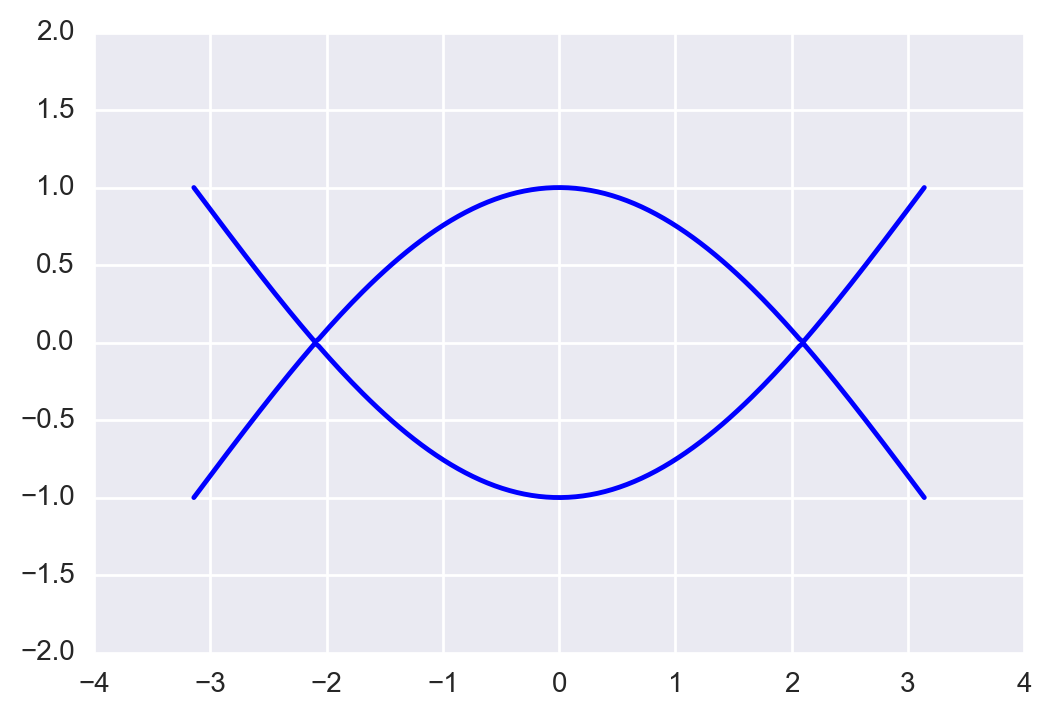

In [111]:
plt.plot(k_point,band,'b')
plt.ylim(-2,2)
plt.show()

In [109]:
def GraHam(kx,ky):
    f1=t*(1+np.cos(kx/2+np.sqrt(3)*ky/2)-1j*np.sin(kx/2+np.sqrt(3)*ky/2)+np.cos(kx)-1j*np.sin(kx))
    f2=t*(1+np.cos(kx/2+np.sqrt(3)*ky/2)+1j*np.sin(kx/2+np.sqrt(3)*ky/2)+np.cos(kx)+1j*np.sin(kx))
    Ham=np.array([[0,f1],[f2,0]])
    return Ham

In [99]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
X,Y = np.meshgrid(k_point,k_point)

ax = fig.add_subplot(1, 1, 1, projection='3d')

ax.plot_surface(X, Y, band1, rstride=4, cstride=4, alpha=0.25)
ax.view_init(30, 45)
plt.show()